
# Data Storytelling with World Development Indicators

This analysis aims to provide insights into various indicators across different countries over time. We will explore trends, correlations, and notable findings within the dataset. This notebook is structured for a non-technical audience, such as executives, and focuses on clear, insightful visualizations and narrative.

## Questions to Explore
1. What are the top countries with the highest access to clean fuels and technologies for cooking?
2. How has the access to electricity changed over time in various regions?
3. Are there any correlations between access to electricity and economic indicators?

Let's dive into the analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'WDICSV.csv'  # Update with actual path if needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.401410,17.911234,18.463874,18.924037,19.437054,20.026254,20.647969,21.165877,21.863139,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.728819,7.005877,7.308571,7.547226,7.875917,8.243018,8.545483,8.906711,9.261320,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.080931,38.422282,38.722108,38.993157,39.337872,39.695279,40.137847,40.522209,41.011132,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.860474,33.903800,38.854624,40.199898,43.017148,44.381259,46.264875,48.100862,48.711995,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.619475,16.500171,24.605861,25.396929,27.037528,29.137914,31.001049,32.777910,33.747907,NaN


### Top Countries with Highest Access to Clean Fuels and Technologies for Cooking

In [2]:

# 1. Identify the top countries with the highest access to clean fuels and technologies for cooking

# Filter the data for the indicator "Access to clean fuels and technologies for cooking (% of population)"
indicator_clean_fuels = "Access to clean fuels and technologies for cooking (% of population)"
clean_fuels_data = data[data['Indicator Name'] == indicator_clean_fuels]

# Get the latest year with data
latest_year = clean_fuels_data.columns[-2]

# Sort countries by the latest year's data and get the top 10 countries
top_countries_clean_fuels = clean_fuels_data[['Country Name', latest_year]].sort_values(by=latest_year, ascending=False).head(10)

top_countries_clean_fuels


,Country Name,2022
196944,Guyana,100.0
211864,Ireland,100.0
202912,Hungary,100.0
340176,Spain,100.0
343160,St. Kitts and Nevis,100.0
186500,Greece,100.0
182024,Germany,100.0
174564,France,100.0
173072,Finland,100.0
165612,Estonia,100.0


### Access to Electricity Over Time in Various Regions

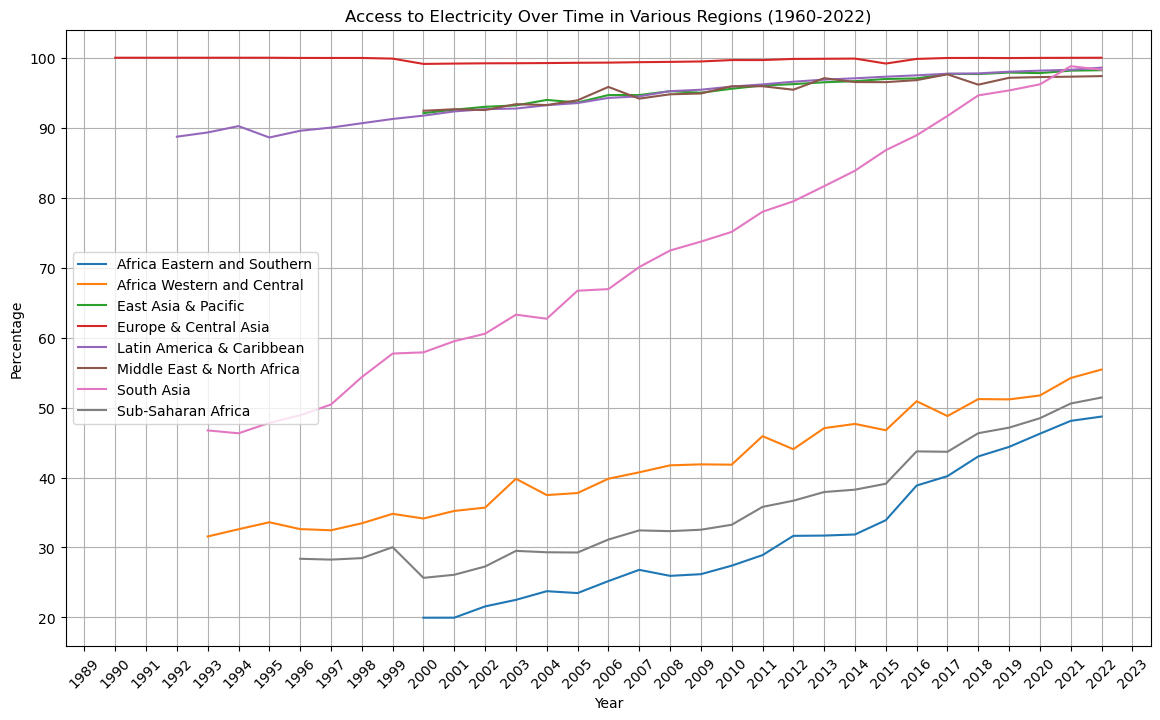

In [3]:

# 2. Access to electricity over time in various regions

# Select the indicator for access to electricity
indicator_electricity = "Access to electricity (% of population)"
electricity_data = data[data['Indicator Name'] == indicator_electricity]

# Select specific regions to compare
regions = [
    'Africa Eastern and Southern', 
    'Africa Western and Central', 
    'East Asia & Pacific', 
    'Europe & Central Asia', 
    'Latin America & Caribbean', 
    'Middle East & North Africa', 
    'South Asia', 
    'Sub-Saharan Africa'
]

# Filter the data for the selected regions
region_data = electricity_data[electricity_data['Country Name'].isin(regions)]

# Plot the access to electricity over time for each region
plt.figure(figsize=(14, 8))

for region in regions:
    region_electricity = region_data[region_data['Country Name'] == region].iloc[:, 4:].T
    region_electricity.columns = ['Percentage']
    plt.plot(region_electricity.index, region_electricity['Percentage'], label=region)

plt.title('Access to Electricity Over Time in Various Regions (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Correlation Between Access to Electricity and Economic Indicators

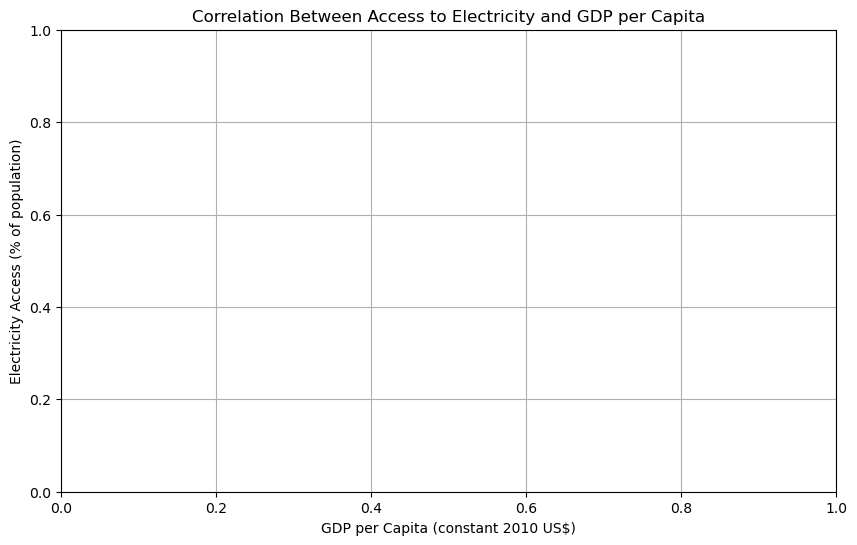

In [8]:
# 3. Correlation between access to electricity and economic indicators

# Select an economic indicator for comparison: "GDP per capita (constant 2010 US$)"
indicator_gdp_per_capita = "GDP per capita (constant 2010 US$)"
gdp_data = data[data['Indicator Name'] == indicator_gdp_per_capita]

# Melt the data to have a long-form dataframe
electricity_long = electricity_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                                         var_name='Year', value_name='Electricity Access')
gdp_long = gdp_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                         var_name='Year', value_name='GDP per Capita')

# Convert the Year column to numeric
electricity_long['Year'] = pd.to_numeric(electricity_long['Year'], errors='coerce')
gdp_long['Year'] = pd.to_numeric(gdp_long['Year'], errors='coerce')

# Merge electricity access data and GDP data on Country Name and Year
merged_data = pd.merge(electricity_long, gdp_long, on=['Country Name', 'Country Code', 'Year'])

# Drop rows with missing values
merged_data.dropna(subset=['Electricity Access', 'GDP per Capita'], inplace=True)

# Plot the correlation between access to electricity and GDP per capita
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='GDP per Capita', y='Electricity Access', hue='Country Name', legend=None)
plt.title('Correlation Between Access to Electricity and GDP per Capita')
plt.xlabel('GDP per Capita (constant 2010 US$)')
plt.ylabel('Electricity Access (% of population)')
plt.grid(True)
plt.show()
